In [1]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 19.7 MB/s eta 0:00:00


In [9]:
import optuna
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [10]:
df = load_breast_cancer()

In [12]:
X = pd.DataFrame(df.data, columns=df.feature_names)
y = pd.Series(df.target, name='target')

# Display the head of the feature DataFrame
display(X.head())

# Display the head of the target Series
display(y.head())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,target
0,0
1,0
2,0
3,0
4,0


In [13]:
y.value_counts()

,count
target,
1,357
0,212


In [15]:
X.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [18]:
X[0:5,:]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X.shape

(569, 30)

In [22]:
# df = pd.Dataframe(df,columns = df.feature_names)
df = pd.DataFrame(df, columns=df.feature_names)

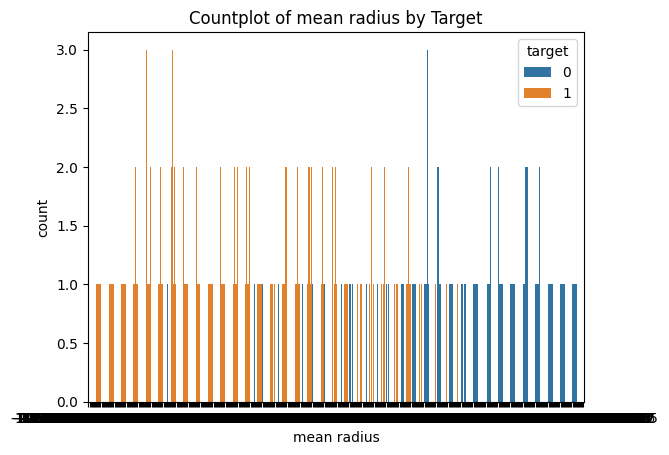

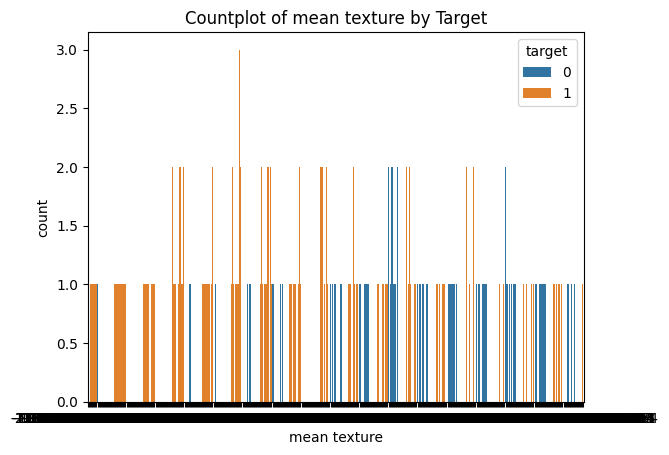

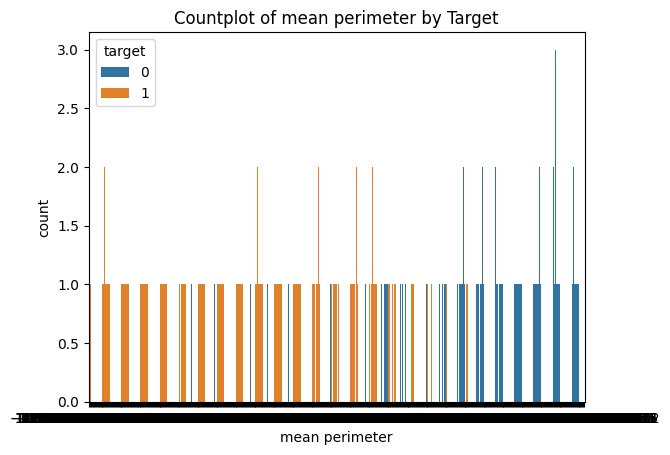

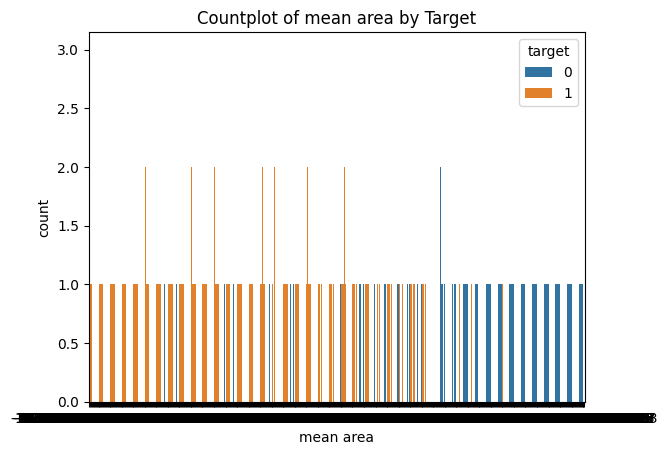

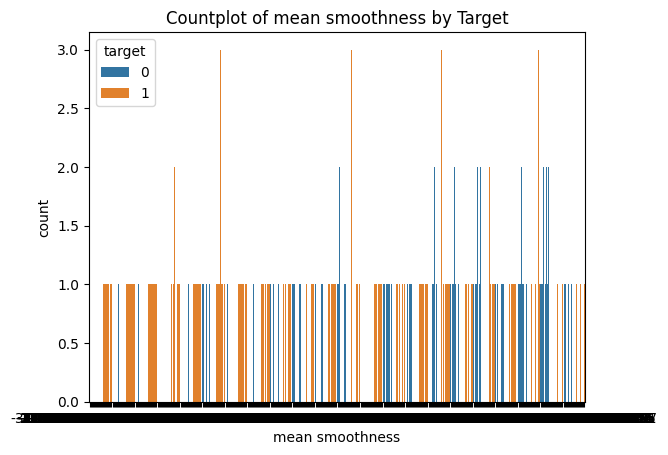

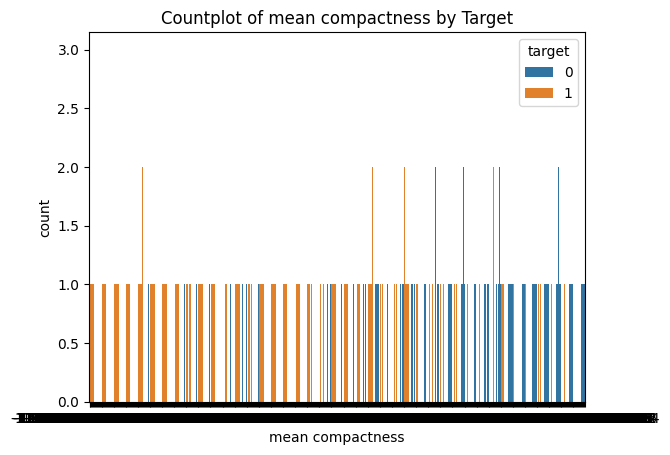

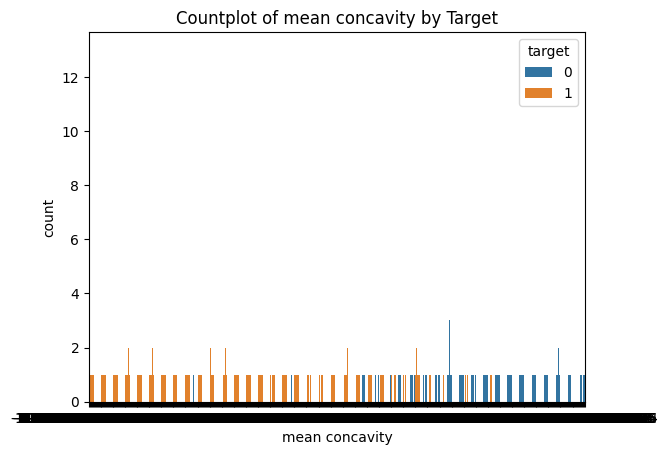

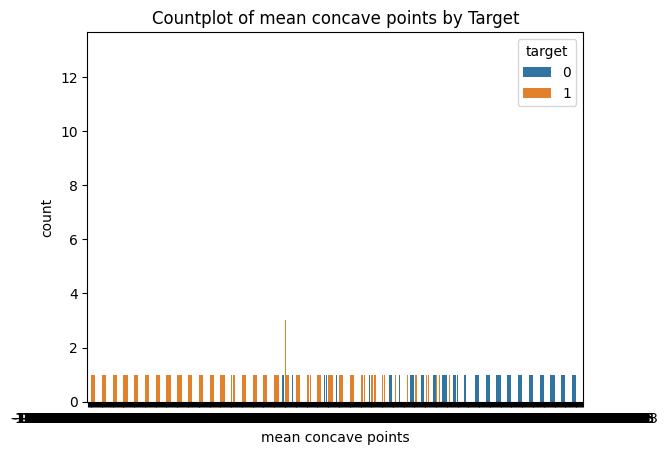

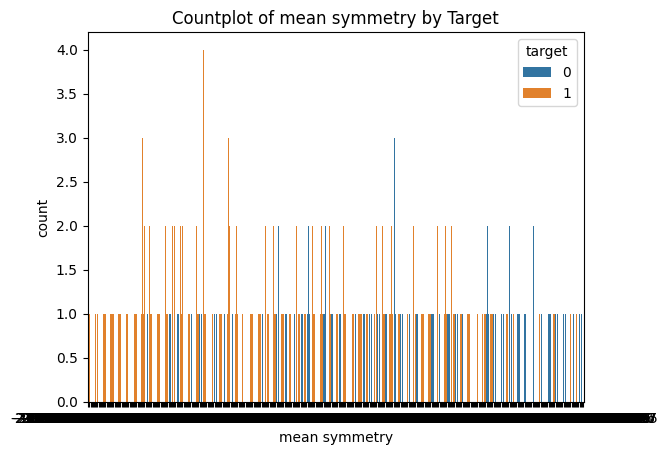

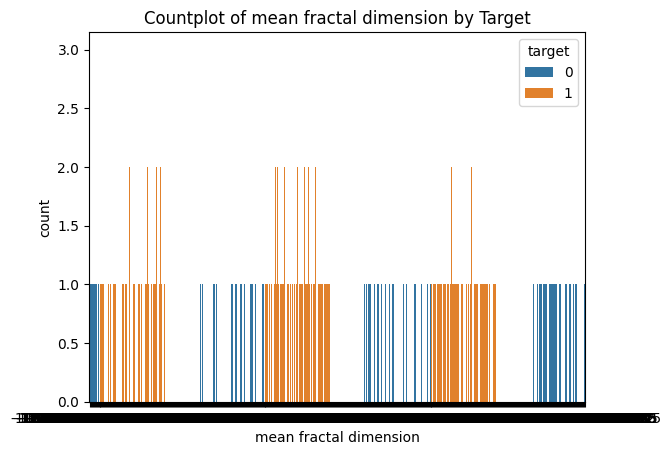

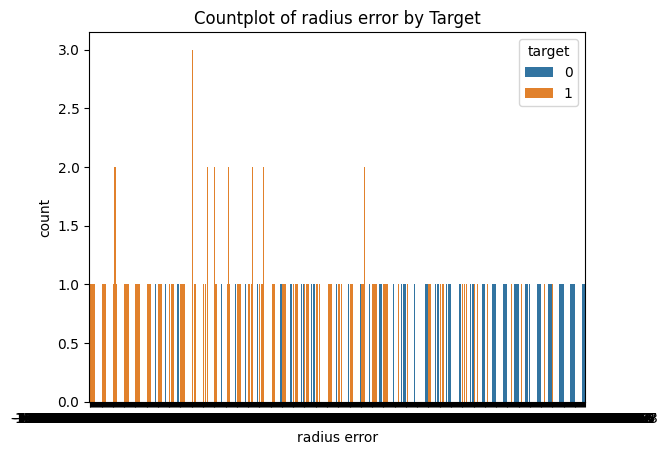

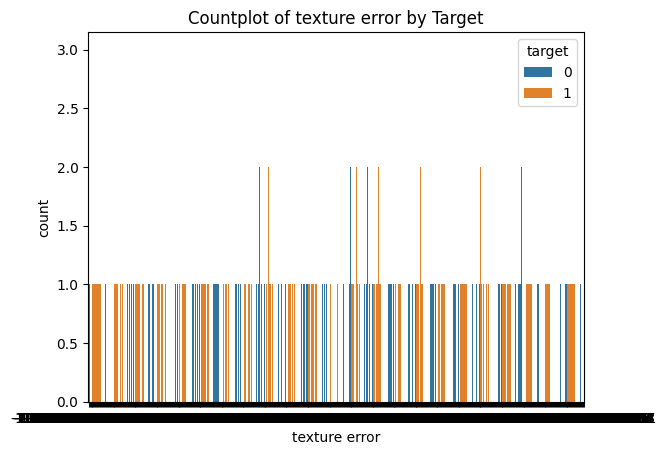

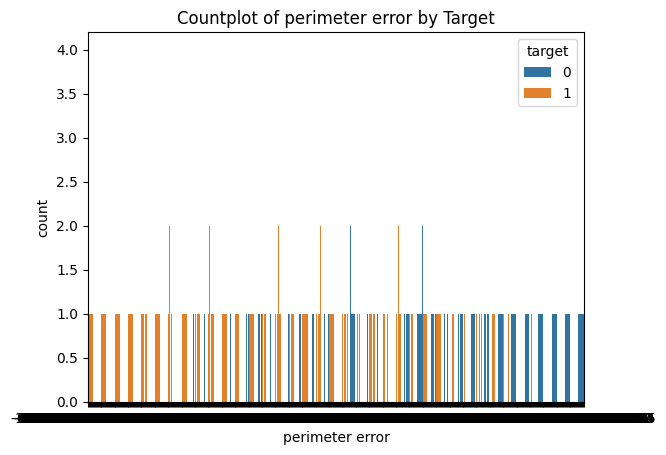

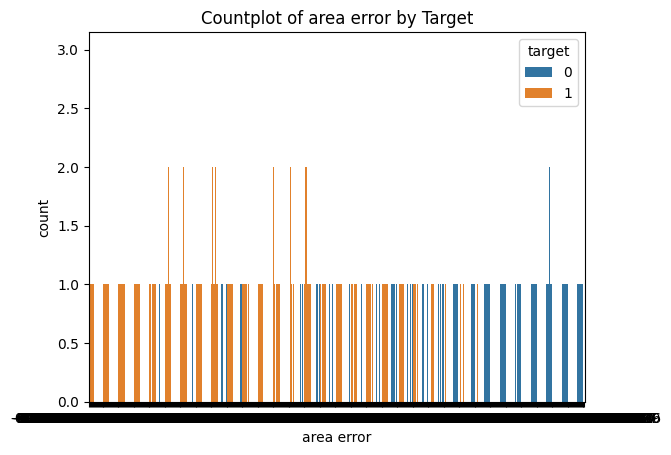

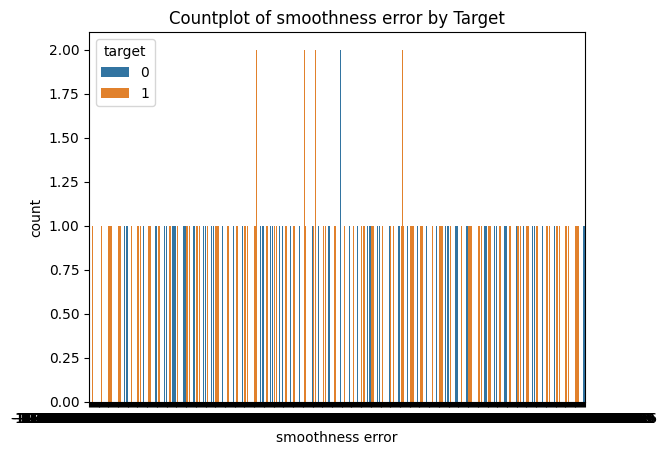

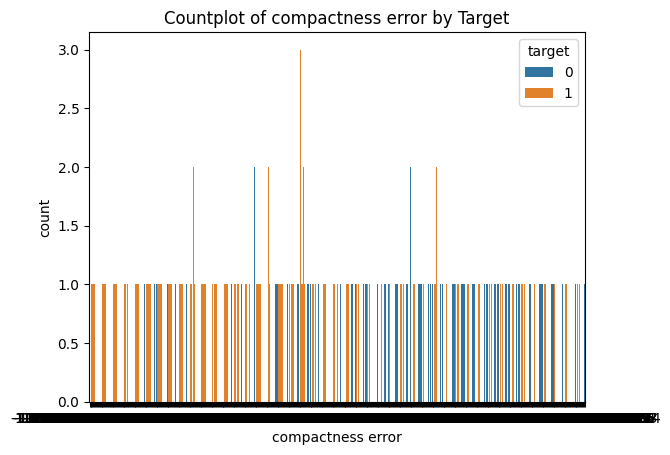

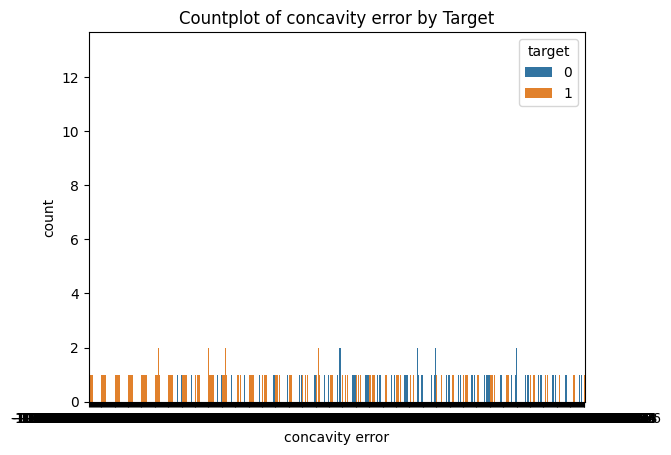

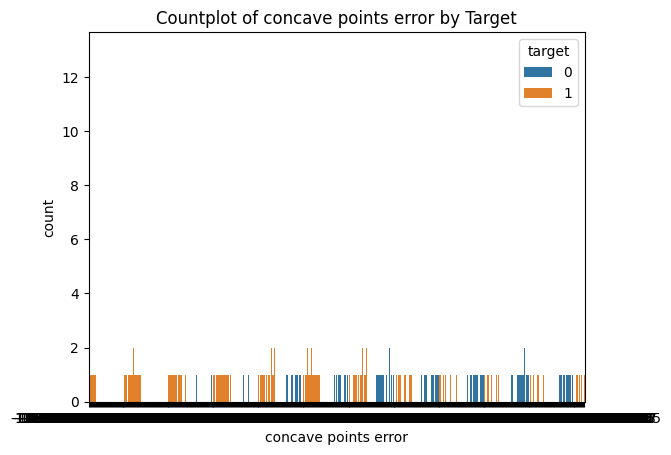

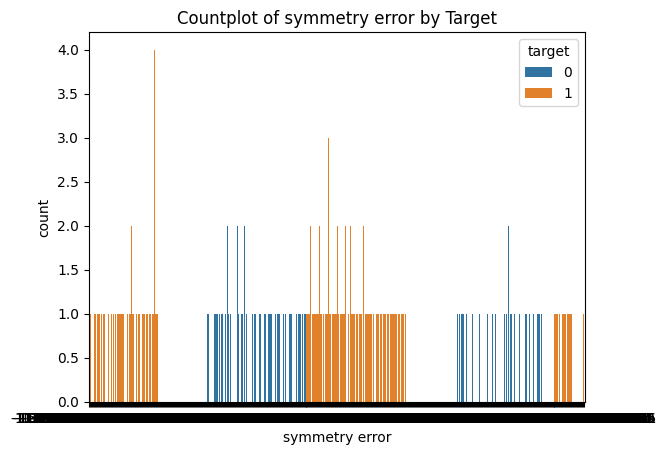

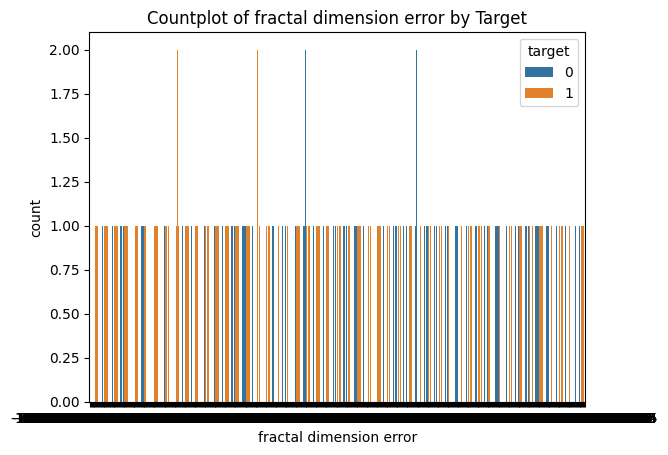

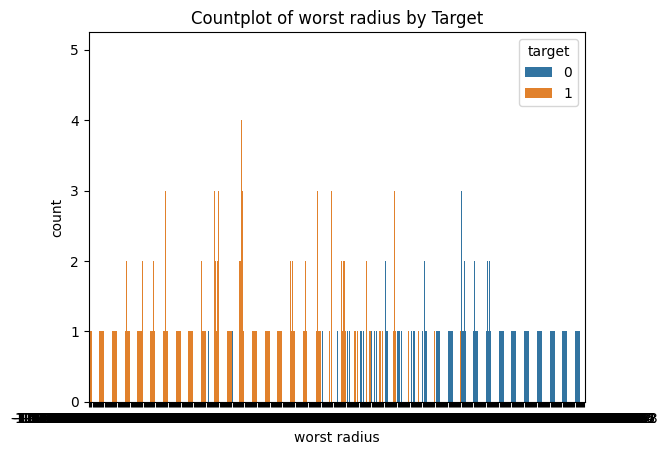

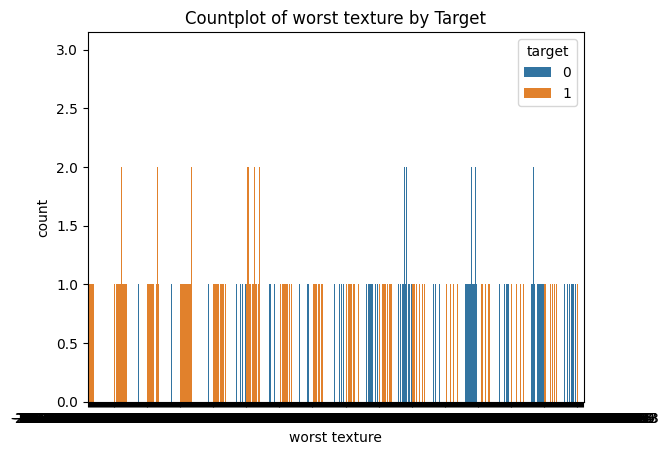

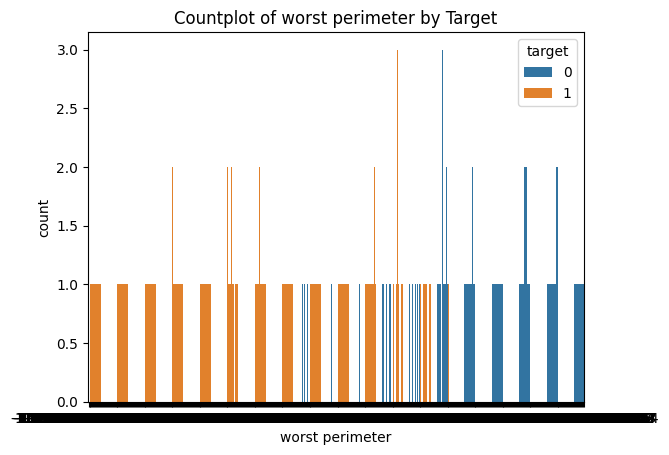

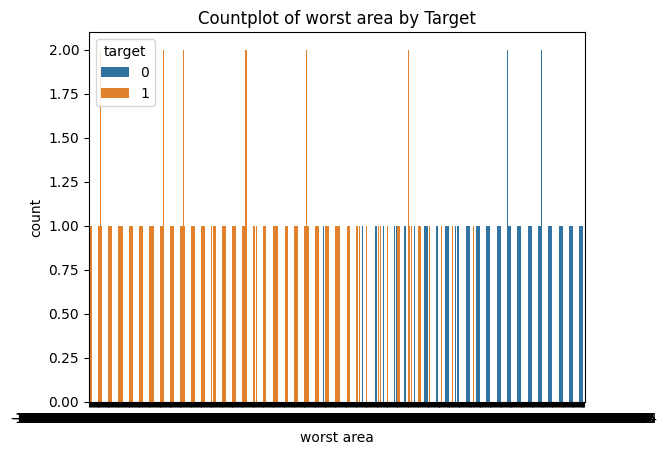

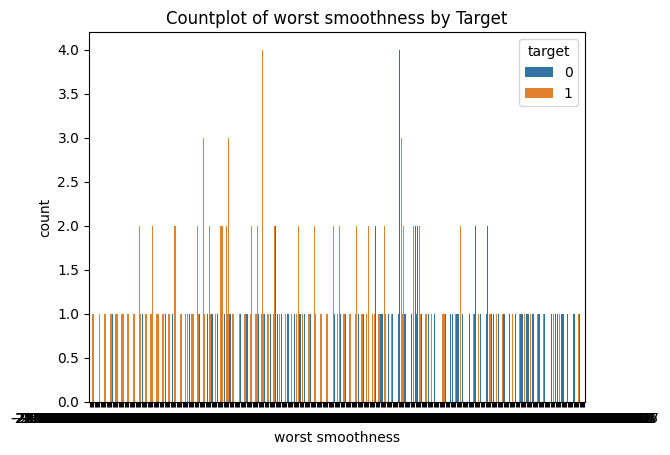

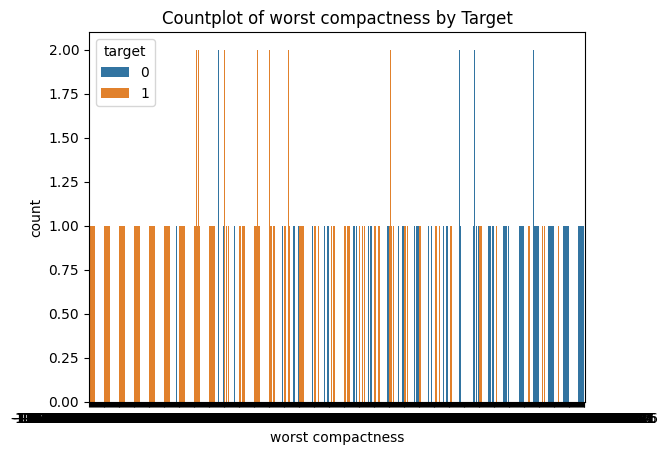

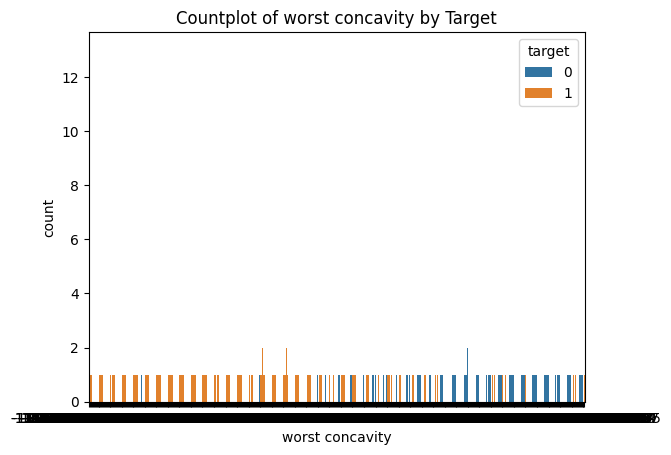

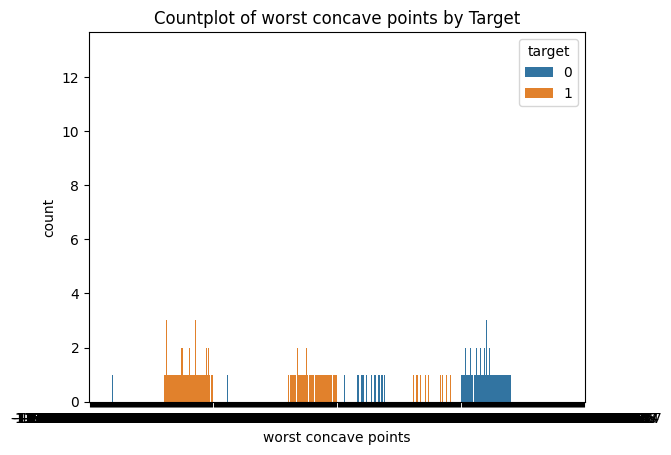

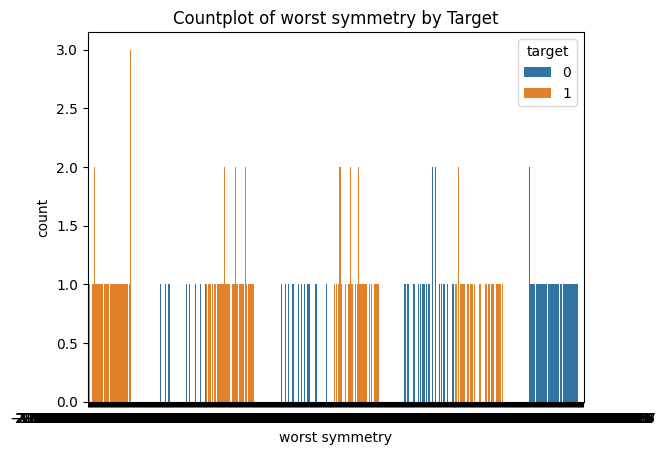

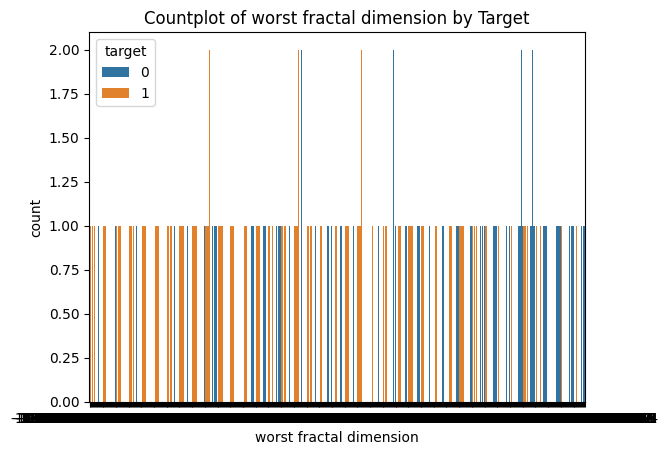

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a temporary DataFrame for plotting including the target column
plot_df = pd.DataFrame(X, columns=load_breast_cancer().feature_names)
plot_df['target'] = y

for i in plot_df.columns[:-1]: # Iterate through feature columns
    sns.countplot(data = plot_df, x= i, hue = 'target')
    plt.title(f'Countplot of {i} by Target')
    plt.show()
    print()

In [29]:
def rf_objective(trial):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_score

    # Define hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    max_depth = trial.suggest_int("max_depth", 2, 20)

    # Create the model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=42
    )

    # Perform cross-validation
    score = cross_val_score(model, X, y, cv=3, scoring="accuracy").mean()

    return score  # ✅ This must return a float


In [31]:
study = optuna.create_study(direction='maximize')
study.optimize(rf_objective, n_trials=50)

[I 2025-06-22 15:13:52,800] A new study created in memory with name: no-name-1f06b258-9a38-466b-8189-2c95219e7041
[I 2025-06-22 15:13:53,923] Trial 0 finished with value: 0.9560753736192332 and parameters: {'n_estimators': 139, 'max_depth': 20}. Best is trial 0 with value: 0.9560753736192332.
[I 2025-06-22 15:13:55,230] Trial 1 finished with value: 0.9578297595841455 and parameters: {'n_estimators': 182, 'max_depth': 19}. Best is trial 1 with value: 0.9578297595841455.
[I 2025-06-22 15:13:57,323] Trial 2 finished with value: 0.9560753736192332 and parameters: {'n_estimators': 299, 'max_depth': 17}. Best is trial 1 with value: 0.9578297595841455.
[I 2025-06-22 15:13:59,701] Trial 3 finished with value: 0.9578297595841455 and parameters: {'n_estimators': 323, 'max_depth': 10}. Best is trial 1 with value: 0.9578297595841455.
[I 2025-06-22 15:14:02,391] Trial 4 finished with value: 0.9578297595841455 and parameters: {'n_estimators': 373, 'max_depth': 19}. Best is trial 1 with value: 0.9578

In [32]:
study.best_trial.value

0.9631021999443052

In [33]:
study.best_trial.params

{'n_estimators': 52, 'max_depth': 9}

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

best_model = RandomForestClassifier(**study.best_trial.params, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9649122807017544


##visualize optuna

In [35]:
from optuna.visualization import plot_contour,plot_optimization_history,plot_parallel_coordinate,plot_slice,plot_param_importances

In [36]:
plot_optimization_history(study)

In [38]:
plot_contour(study).show()

In [39]:
plot_parallel_coordinate(study)

In [40]:
plot_slice(study).show()

In [41]:
plot_param_importances(study).show()

##Optimizing Multiple ML Models

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [53]:
def objective(trial):
    classifier_name = trial.suggest_categorical(
        'classifier',
        ['SVC', 'LogisticRegression', 'RandomForestClassifier', 'GradientBoostingClassifier', 'xgboost']
    )

    if classifier_name == 'SVC':
        svc_c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)
        kernel = trial.suggest_categorical('kernel', ['rbf', 'linear', 'poly', 'sigmoid'])
        gamma = trial.suggest_categorical('gamma', ['scale', 'auto'] + [1 / X_train.shape[1]])

        model = SVC(C=svc_c, kernel=kernel, gamma=gamma, random_state=42)

    elif classifier_name == 'RandomForestClassifier':
        model = RandomForestClassifier(
            n_estimators=trial.suggest_int('n_estimators', 50, 300),
            max_depth=trial.suggest_int('max_depth', 3, 20),
            min_samples_split=trial.suggest_int('min_samples_split', 2, 10),
            min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10),
            bootstrap=trial.suggest_categorical('bootstrap', [True, False]),
            random_state=42
        )

    elif classifier_name == 'GradientBoostingClassifier':
        model = GradientBoostingClassifier(
            n_estimators=trial.suggest_int('n_estimators', 50, 300),
            learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            max_depth=trial.suggest_int('max_depth', 3, 20),
            min_samples_split=trial.suggest_int('min_samples_split', 2, 10),
            min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10),
            random_state=42
        )

    elif classifier_name == 'LogisticRegression':
        C = trial.suggest_float('C', 0.01, 1.0)
        solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'sag', 'saga'])
        penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])

        # Skip invalid combinations
        valid_combos = {
            'liblinear': ['l1', 'l2'],
            'lbfgs': ['l2'],
            'sag': ['l2'],
            'saga': ['l1', 'l2']
        }
        if penalty not in valid_combos.get(solver, []):
            raise optuna.exceptions.TrialPruned()

        model = LogisticRegression(
            C=C,
            solver=solver,
            penalty=penalty,
            random_state=42,
            max_iter=1000
        )

    elif classifier_name == 'xgboost':
        model = xgb.XGBClassifier(
            n_estimators=trial.suggest_int('n_estimators', 50, 300),
            learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            max_depth=trial.suggest_int('max_depth', 3, 20),
            min_child_weight=trial.suggest_int('min_child_weight', 1, 10),
            use_label_encoder=False,
            eval_metric='logloss',
            random_state=42
        )

    else:
        raise ValueError("Unsupported classifier")

    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score


In [54]:
study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=100)

[I 2025-06-22 15:33:58,513] A new study created in memory with name: no-name-a491604b-4542-42ea-a1e3-442d4a72aeae
[I 2025-06-22 15:33:58,560] Trial 0 finished with value: 0.8746950156849076 and parameters: {'classifier': 'SVC', 'svc_c': 0.0004838004168801928, 'kernel': 'linear', 'gamma': 0.03333333333333333}. Best is trial 0 with value: 0.8746950156849076.
[I 2025-06-22 15:34:00,760] Trial 1 finished with value: 0.9428372255141165 and parameters: {'classifier': 'xgboost', 'n_estimators': 72, 'learning_rate': 0.016669044361404324, 'max_depth': 5, 'min_child_weight': 6}. Best is trial 1 with value: 0.9428372255141165.
[I 2025-06-22 15:34:01,117] Trial 2 finished with value: 0.9516382014639246 and parameters: {'classifier': 'xgboost', 'n_estimators': 209, 'learning_rate': 0.017612676425794227, 'max_depth': 5, 'min_child_weight': 8}. Best is trial 2 with value: 0.9516382014639246.
[I 2025-06-22 15:34:03,890] Trial 3 finished with value: 0.9516527245265481 and parameters: {'classifier': 'Gr

In [55]:
best_trial = study.best_trial
print("Best trial:")
print(f"  Value: {best_trial.value}")
print("  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

Best trial:
  Value: 0.9780120831881027
  Params: 
    classifier: LogisticRegression
    C: 0.24024752242458786
    solver: liblinear
    penalty: l1


In [56]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_C,params_bootstrap,params_classifier,params_gamma,params_kernel,params_learning_rate,params_max_depth,params_min_child_weight,params_min_samples_leaf,params_min_samples_split,params_n_estimators,params_penalty,params_solver,params_svc_c,state
0,0,0.874695,2025-06-22 15:33:58.517000,2025-06-22 15:33:58.560284,0 days 00:00:00.043284,NaN,NaN,SVC,0.033333,linear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000484,COMPLETE
1,1,0.942837,2025-06-22 15:33:58.562652,2025-06-22 15:34:00.760076,0 days 00:00:02.197424,NaN,NaN,xgboost,NaN,NaN,0.016669,5.0,6.0,NaN,NaN,72.0,NaN,NaN,NaN,COMPLETE
2,2,0.951638,2025-06-22 15:34:00.763170,2025-06-22 15:34:01.117068,0 days 00:00:00.353898,NaN,NaN,xgboost,NaN,NaN,0.017613,5.0,8.0,NaN,NaN,209.0,NaN,NaN,NaN,COMPLETE
3,3,0.951653,2025-06-22 15:34:01.118098,2025-06-22 15:34:03.890868,0 days 00:00:02.772770,NaN,NaN,GradientBoostingClassifier,NaN,NaN,0.024671,12.0,NaN,9.0,9.0,79.0,NaN,NaN,NaN,COMPLETE
4,4,0.953817,2025-06-22 15:34:03.892055,2025-06-22 15:34:04.385353,0 days 00:00:00.493298,NaN,False,RandomForestClassifier,NaN,NaN,NaN,19.0,NaN,3.0,7.0,57.0,NaN,NaN,NaN,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.945030,2025-06-22 15:35:12.165112,2025-06-22 15:35:12.196364,0 days 00:00:00.031252,NaN,NaN,SVC,scale,linear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3825.088354,COMPLETE
96,96,0.975805,2025-06-22 15:35:12.197211,2025-06-22 15:35:12.225494,0 days 00:00:00.028283,0.304684,NaN,LogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l1,liblinear,NaN,COMPLETE
97,97,0.978012,2025-06-22 15:35:12.226375,2025-06-22 15:35:12.253567,0 days 00:00:00.027192,0.240248,NaN,LogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,l1,liblinear,NaN,COMPLETE
98,98,0.951624,2025-06-22 15:35:12.254405,2025-06-22 15:35:13.470874,0 days 00:00:01.216469,NaN,False,RandomForestClassifier,NaN,NaN,NaN,7.0,NaN,2.0,10.0,181.0,NaN,NaN,NaN,COMPLETE


In [57]:
study.trials_dataframe()['params_classifier'].value_counts()

,count
params_classifier,
LogisticRegression,69
SVC,8
xgboost,8
RandomForestClassifier,8
GradientBoostingClassifier,7


In [58]:
plot_optimization_history(study).show()